## Task 2. Product Category Clustering

##### Objective: Simplify the dataset by clustering product categories into 4-6 meta-categories.

##### Task: Create a model to group all reviews into 4-6 broader categories. Example suggestions:

- Ebook readers

- Batteries

- Accessories (keyboards, laptop stands, etc.)

- Non-electronics (Nespresso pods, pet carriers, etc.)

##### Note: Analyze the dataset in depth to determine the most appropriate categories.

##### How to Solve with Transformers

- Extract product category text from your dataset

- Generate embeddings using a transformer model (like BERT, RoBERTa, or Sentence-BERT)

- Apply clustering to these embeddings (for example K-means with k=4-6)

- Analyze and label the resulting clusters

1. Reading data and analyzing categories:

In [1]:
import pandas as pd

# Load data from a CSV file
df = pd.read_csv("drive/MyDrive/Project-NLB-Business/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

# Display the first 5 lines of data to verify the data format
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [2]:
# Display columns in the data
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [3]:
# Display the 20 most frequent categories in the 'categories' column
df['categories'].value_counts().head(20)

,count
categories,
"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",797
"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon Echo Show Smart Assistant - White,Smart Home Automation,Electronics,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Consumer Electronics,Wireless Speakers,Home Improvement,Amazon Home,Amazon,Computer Speakers,Voice-Enabled Smart Assistants",650
"Amazon Echo,Smart Home,Networking,Home & Tools,Home Improvement,Smart Home Automation,Voice Assistants,Amazon Home,Amazon,Smart Hub & Kits,Digital Device 3",590
"Computers,Fire Tablets,Electronics Features,Computer Accessories,Tablets,Top Rated,Amazon Tablets,Electronics,Kids' Tablets,iPad & Tablets,Cases & Bags,Electronics, Tech Toys, Movies, Music,Computers & Tablets",561
"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",467
"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & Tablets,Tablets & eBook Readers",371
"Fire Tablets,Tablets,All Tablets,Amazon Tablets,Computers & Tablets",287
"Amazon Echo,Home Theater & Audio,MP3 MP4 Player Accessories,Electronics,Portable Audio,Compact Radios Stereos,Smart Hubs & Wireless Routers,Featured Brands,Smart Home & Connected Living,Home Security,Kindle Store,Electronic Components,Home Automation,Mobile Bluetooth Speakers,Home, Garage & Office,Amazon Tap,Home,Mobile Speakers,TVs & Electronics,Portable Bluetooth Speakers,Bluetooth & Wireless Speakers,Electronics Features,Frys,Speakers,Mobile,Digital Device 3,Smart Home,Home Improvement,Electronics, Tech Toys, Movies, Music,Smart Home & Home Automation Devices,Smart Hubs,MP3 Player Accessories,Home Safety & Security,Voice Assistants,Amazon Home,Alarms & Sensors,Portable Audio & Electronics,Amazon Devices,Audio,Bluetooth Speakers,MP3 Accessories,All Bluetooth & Wireless Speakers",225
"Amazon Echo,Virtual Assistant Speakers,Electronics Features,Home & Tools,Smart Home Automation,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Wireless Speakers,Smart Home,Home Improvement,Voice Assistants,Amazon Home,Amazon",195


2. Convert classes to numerical representations using Transformer Embeddings:

In [4]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch

# Load the tokenizer and DistilBERT model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Function to convert text to numeric representations using DistilBERT
def get_embeddings(text):
  # Text encoding
  inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

  # Get the text representation from DistilBERT
  with torch.no_grad():
    outputs = model(**inputs)

  # Return to the text representation (embeddings)
  embeddings = outputs.last_hidden_state.mean(dim=1) # Average representation across words
  return embeddings

# Apply the function to the categories in the 'categories' column to get numerical representations
category_embeddings = df['name'].apply(get_embeddings)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

read about clustering and why k (number of clusters) matters

3. Apply clustering using K-Means:

In [5]:
from sklearn.cluster import KMeans
import numpy as np

# Convert numeric representations to a Numpy matrix
category_embeddings_np = np.vstack(category_embeddings)

# Apply the K-Means algorithm to cluster the data into 5 categories (you can change the number)
kmeans = KMeans(n_clusters=4, random_state=42)
df['category_cluster'] = kmeans.fit_predict(category_embeddings_np)

# Display the results
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs',
       'category_cluster'],
      dtype='object')

4. Analyze the results and name the groups:

In [6]:
df.category_cluster.value_counts()

,count
category_cluster,
0,1869
2,1664
3,778
1,689


In [7]:
name_groups = df.groupby('category_cluster').name.apply(set) # we want to se what is in every cluster?
name_groups

,name
category_cluster,
0,"{Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includ..."
1,"{Amazon - Kindle Voyage - 6"" - 4GB - Black, Br..."
2,"{Amazon - Echo Plus w/ Built-In Hub - Silver, ..."
3,"{Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1..."


In [8]:
name_groups.iat[0] # fire tablets

{'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Blue',
 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Blue',
 'All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
 'All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi, 32 GB - Includes Special Offers, Black',
 'All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
 'Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum',
 'Fire HD 8 Tablet with Alexa, 8" HD Display, 32 GB, Tangerine - with Special Offers',
 'Fire Tablet with Alexa, 7" Display, 16 GB, Magenta - with Special Offers',
 'Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black',
 'Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers',
 'Kindle Oasis E-reader with Leather Charging Cover - Black, 6" High-Resolution Display (300 ppi), Wi-Fi - Includes 

In [9]:
name_groups.iat[1] # kindle

{'Amazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Black',
 'Amazon - Kindle Voyage - 6" - 4GB - Black',
 'Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders',
 'Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)',
 'Brand New Amazon Kindle Fire 16gb 7" Ips Display Tablet Wifi 16 Gb Blue'}

In [10]:
name_groups.iat[2] # audio and video

{'Amazon - Echo Plus w/ Built-In Hub - Silver',
 'Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7" Screen',
 'Amazon Fire TV with 4K Ultra HD and Alexa Voice Remote (Pendant Design) | Streaming Media Player',
 'Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker'}

In [11]:
name_groups.iat[3] # fire tablets for kids

{'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case',
 'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case'}

alternatively you can embed and cluster product names and descriptions

5. Final naming of groups:

In [12]:
# Rename groups based on manual analysis
df['category_cluster'] = df['category_cluster'].replace({
    0: 'Fire tablets', # why this name?
    1: 'Kindle',
    2: 'Audio and video',
    3: 'Fire tablets for kids',
})

# # Show final results
# df[['categories', 'category_cluster']].head()
df[['name', 'category_cluster']].head()

,name,category_cluster
0,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Kindle
1,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Kindle
2,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Kindle
3,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Kindle
4,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Kindle


A graph showing the distribution of categories within groups.

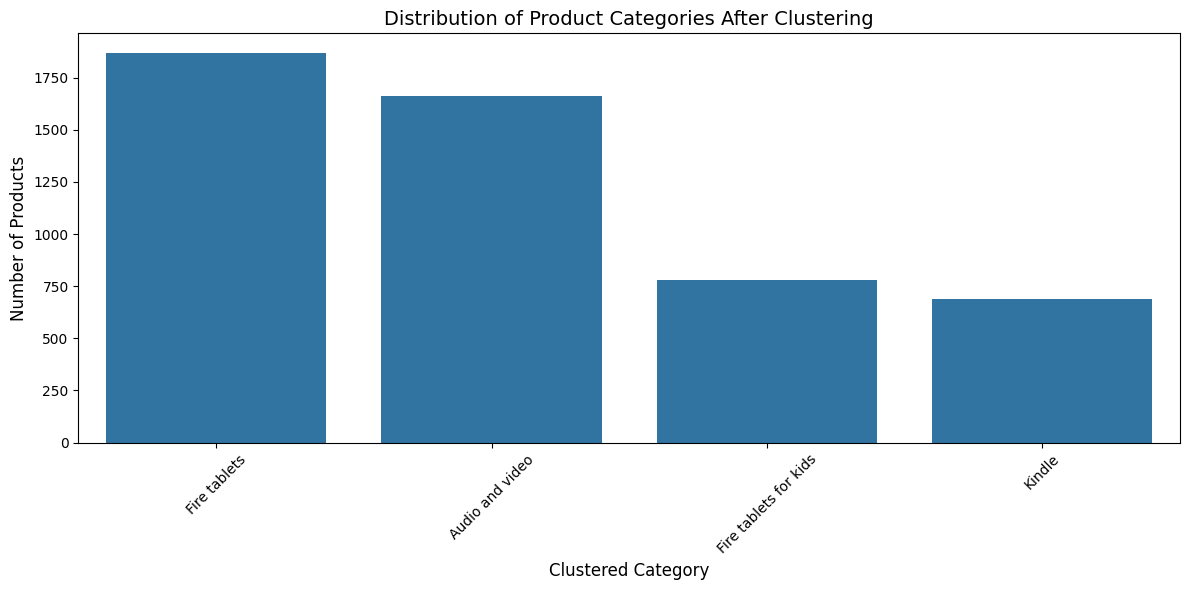

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the figure size
plt.figure(figsize=(12, 6))

# Plotting the number of products in each simplified category group
sns.countplot(data=df, x='category_cluster', order=df['category_cluster'].value_counts().index)

# Adding titles to the chart
plt.title("Distribution of Product Categories After Clustering", fontsize=14)
plt.xlabel("Clustered Category", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Displaying the chart
plt.show()


## Task 3. Summarize reviews using generative AI

##### Objective: Summarize reviews into articles that recommend the top products for each category.

##### Task: Create a model that generates a short article (like a blog post) for each product category. The output should include:

- Top 3 products and key differences between them.

- Top complaints for each of those products.

- Worst product in the category and why it should be avoided.

Consider using Pretrained Generative Models like T5, GPT-3, or BART for generating coherent and well-structured summaries. These models excel at tasks like summarization and text generation, and can be fine-tuned to produce high-quality outputs based on the extracted insights from reviews. You are encouraged to explore other Transformer-based models available on platforms like Hugging Face. Fine-tuning any of these pre-trained models on your specific dataset could further improve the relevance and quality of the generated summaries.

1.Preparing data for use with the generative model

In [14]:
"""
you have to write a query to *OpenAI API* to generate a blog post highlighting diffferences between top 3 products, mention top complaints about each"
you will also need to give it some sample reviews for every product

"""

'\nyou have to write a query to *OpenAI API* to generate a blog post highlighting diffferences between top 3 products, mention top complaints about each"\nyou will also need to give it some sample reviews for every product\n\n'

In [15]:
# first product in cluster 0
df[df.name == 'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Blue']['reviews.rating'].mean()
df
# has an average rating of 4.647
# for all the products in cluster 0 you can find 3 best productes
gg = df[df.category_cluster == 0].groupby('name')
gg['reviews.rating'].mean().sort_values(ascending=False)

,reviews.rating
name,


1.Extract the top 3 products from each cluster (category)

In [16]:
# # Get the top 3 products from Cluster 0 based on average ratings
# top_3_cluster_0 = df[df.category_cluster == 0].groupby('name')['reviews.rating'].mean().sort_values(ascending=False).head(3)

# # Show the top products in Cluster 0
# print("Top 3 Products in Cluster 0:")
# print(top_3_cluster_0)

# # Get the top 3 products from Cluster 1
# top_3_cluster_1 = df[df.category_cluster == 1].groupby('name')['reviews.rating'].mean().sort_values(ascending=False).head(3)

# # Show the top products in Cluster 1
# print("Top 3 Products in Cluster 1:")
# print(top_3_cluster_1)

# # Get the top 3 products from Cluster 2
# top_3_cluster_2 = df[df.category_cluster == 2].groupby('name')['reviews.rating'].mean().sort_values(ascending=False).head(3)

# # Display the top products in Cluster 2
# print("Top 3 Products in Cluster 2:")
# print(top_3_cluster_2)

# # Get the top 3 products from Cluster 3
# top_3_cluster_3 = df[df.category_cluster == 3].groupby('name')['reviews.rating'].mean().sort_values(ascending=False).head(3)

# # Display the top products in Cluster 3
# print("Top 3 Products in Cluster 3:")
# print(top_3_cluster_3)

In [17]:
# We get the top 3 products in each category (category_cluster) based on the average review ratings.
top_products_per_cluster = (
  df.groupby(['category_cluster', 'name'])['reviews.rating']
  .mean()
  .reset_index()
  .sort_values(['category_cluster', 'reviews.rating'], ascending=[True, False])
  )

# We only take the top 3 products in each category.
top_3_per_cluster = top_products_per_cluster.groupby('category_cluster').head(3)

# Display the results.
top_3_per_cluster

,category_cluster,name,reviews.rating
2,Audio and video,Amazon Fire TV with 4K Ultra HD and Alexa Voic...,5.000000
0,Audio and video,Amazon - Echo Plus w/ Built-In Hub - Silver,4.749153
1,Audio and video,Amazon Echo Show Alexa-enabled Bluetooth Speak...,4.662722
14,Fire tablets,Kindle Oasis E-reader with Leather Charging Co...,4.820513
8,Fire tablets,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",4.675000
9,Fire tablets,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",4.669811
16,Fire tablets for kids,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",4.577540
17,Fire tablets for kids,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",4.516129
20,Kindle,Amazon 9W PowerFast Official OEM USB Charger a...,4.863636
18,Kindle,Amazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Black,4.818182


2.Extract reviews for each product from the top 3 products in each category

In [18]:
# Create a dictionary to store reviews for each product.
top_products_reviews = {}

# List of best products (product names from the results I got)
top_products = [
    "Amazon Fire TV with 4K Ultra HD and Alexa Voice Remote (Pendant Design) | Streaming Media Player",
    "Amazon - Echo Plus w/ Built-In Hub - Silver",
    "Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7\" Screen",

    "Kindle Oasis E-reader with Leather Charging Cover - Black, 6\" High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers",
    "All-New Fire HD 8 Tablet, 8\" HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta",
    "Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum",

    "Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",
    "Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",

    "Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders",
    "Amazon - Kindle Voyage - 4GB - Wi-Fi + 3G - Black",
    "Amazon - Kindle Voyage - 6\" - 4GB - Black"
]

# Extract reviews for each product and store them in the dictionary.
for product in top_products:
    reviews = df[df['name'] == product]['reviews.text'].dropna().tolist()
    top_products_reviews[product] = reviews


3. Use the OpenAI API to generate articles for each cluster:

In [22]:
import openai
import random

# Set up API key
from openai import OpenAI
from google.colab import userdata
userdata.get('OpenAI_Key')
# Download the key of secrets
api_key = userdata.get('OpenAI_Key')

# Create client
client = OpenAI(api_key=api_key)

# Iterate over each category
for category in df['category_cluster'].unique():
    # Get the top 3 products in each category
    products_in_category = df[df['category_cluster'] == category]['name'].unique()[:3]  # You can adjust this if needed

    # Random reviews for each product
    sample_reviews = ""
    for product in products_in_category:
        # Check if product exists in the reviews dictionary
        if product in top_products_reviews:
            reviews = top_products_reviews[product]
            selected_reviews = random.sample(reviews, min(5, len(reviews)))
            sample_reviews += f"\n\nProduct: {product}\nReviews:\n" + "\n".join(["- " + r for r in selected_reviews])
        else:
            sample_reviews += f"\n\nProduct: {product}\nReviews:\nNo reviews available."

    # Generation Prompt
    prompt = f"""
    You are a product expert. Based on the reviews provided below, write a blog-style article recommending the best products in the '{category}' category.

    For each of the top 3 products:
    - Highlight the key differences between them.
    - Mention top complaints (if any).
    - Provide a recommendation summary.

    Reviews:
    {sample_reviews}
    """

    # Send request to OpenAI for each category
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.7,
        max_tokens=1000
    )

    # Print the resulting article for each category
    print(f"Article for Category: {category}")
    print(response.choices[0].message.content)
    print("\n" + "="*50 + "\n")


Article for Category: Kindle
Based on the reviews provided, it seems that the top 3 products in the Kindle category are:

1. Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016)
2. Amazon 9W PowerFast Official OEM USB Charger and Power Adapter
3. Amazon Kindle Voyage 6" 4GB Black

Let's break down the key differences between these products:

1. Amazon Kindle E-Reader 6" Wifi (8th Generation, 2016):
This Kindle is a basic e-reader with wifi connectivity. Unfortunately, there are no reviews available for this specific product, so it is difficult to provide detailed feedback on its performance.

2. Amazon 9W PowerFast Official OEM USB Charger and Power Adapter:
This charger is specifically designed for Fire Tablets and Kindle eReaders. Some users have complained that despite being advertised as a fast charger, it charges at a normal speed. However, others have found it easy to use and effective in charging their devices quickly.

3. Amazon Kindle Voyage 6" 4GB Black:
The Kindle Voyage is

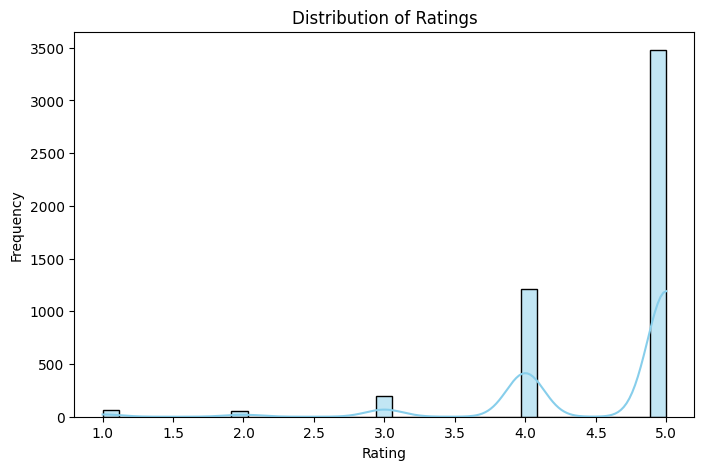

In [23]:

# If you have a ratings column like 'reviews.rating'
plt.figure(figsize=(8, 5))
sns.histplot(df['reviews.rating'], kde=True, color='skyblue')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()